# 1. Get all folder name and details.

In [1]:
# Main
import os 
cur_path=os.getcwd()
print(cur_path)
File_dir_path=cur_path
file_dir=os.listdir(path=File_dir_path)
print(f"All files : {file_dir}")
csv_files=[i for i in file_dir if str(i).endswith(".csv") and " Copy" not in str(i)]
print(f"csv_files : {csv_files}")
exl_files=[i for i in file_dir if str(i).endswith(".xlsx") and " Copy" not in str(i)]
print(f"Excel_files : {exl_files}")

c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
All files : ['.gitkeep', 'AutoModelBuilding.ipynb', 'Duplicate Copies', 'Employee_attrition.csv', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']
csv_files : ['Employee_attrition.csv', 'Income&Expenditure.csv']
Excel_files : ['Income&Expenditure.xlsx']


# 2. Read excel and convert to csv

In [2]:
#Main
import pandas as pd
d=dict()
for i in exl_files:
    exl_data=pd.read_excel(i)
    exl_data.to_csv(i[:-5]+".csv")
    d.update({i[:-5]+".csv":True})
file_dir=os.listdir(path=File_dir_path)

print(File_dir_path)
print(file_dir)



c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
['.gitkeep', 'AutoModelBuilding.ipynb', 'Duplicate Copies', 'Employee_attrition.csv', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']


In [3]:
for i in range(len(csv_files)):
    print(f"Press {i+1} for selecting {csv_files[i]}")
print(f"User Choise : ",end="")
ch=2 #int(input("User Choice : "))
print(ch)
def f():
    if csv_files[ch-1] in d.keys():
        data=pd.read_csv(csv_files[ch-1]).iloc[:,2:]
    else:
        data=pd.read_csv(csv_files[ch-1]).iloc[:,1:]
    return data

Press 1 for selecting Employee_attrition.csv
Press 2 for selecting Income&Expenditure.csv
User Choise : 2


In [4]:
data=f()
data.head()

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.0,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.1,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.1,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.1,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.1,205899.31


# 3. Decalare ML Model 

In [5]:
Reg_model_flag=None
if len(data.iloc[:,-1].unique())>2:
    print("Regression model to be applied")
    Reg_model_flag="regression"

elif len(data.iloc[:,-1].unique())==2:
    print("Classification model to be applied")
    Reg_model_flag="classification"
    
else:
    pass

Regression model to be applied


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
model_linearRegression=LinearRegression()
model_SVRegression=SVR()
model_DTRegression=DecisionTreeRegressor()
model_RFRegression=RandomForestRegressor()
model_regression={"Linear Regression":model_linearRegression,
                  "SVM Regression":model_SVRegression,
                  "DecisionTree Regression":model_DTRegression,
                  "Randomforest Regression":model_RFRegression}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_logsClassify=LogisticRegression()
model_SVClassify=SVC()
model_DTClassify=DecisionTreeClassifier()
model_RFClassify=RandomForestClassifier()
model_Classify={"Logistic Regression":model_logsClassify,
                "SVM Classification":model_SVClassify,
                "DecisionTree Classification":model_DTClassify,
                "Randomforest Classification":model_RFClassify}

In [7]:
for model_name,model in model_regression.items():
    print(model_name,end=" : ")
    print(model)
print()
for model_name,model in model_Classify.items():
    print(model_name,end=" : ")
    print(model)

Linear Regression : LinearRegression()
SVM Regression : SVR()
DecisionTree Regression : DecisionTreeRegressor()
Randomforest Regression : RandomForestRegressor()

Logistic Regression : LogisticRegression()
SVM Classification : SVC()
DecisionTree Classification : DecisionTreeClassifier()
Randomforest Classification : RandomForestClassifier()


# EDA(Explanatory Data Analysis)

In [8]:
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

# Data Cleaning - Outliers, Null values

In [9]:
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   267 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


In [11]:
if "Date" in data.columns:
    data.set_index("Date",inplace=True)
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
01-08-2023,2,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
02-08-2023,3,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
03-08-2023,4,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
04-08-2023,5,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
01-02-2024,256,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
02-02-2024,257,Friday,None,0.0,None,None,27700.0,160080.37,339000.58


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=list(data.columns[data.dtypes=="object"])#[1:]
print(obj_col)
for i in obj_col:
    data[i]=le.fit_transform(data[i])
data

['Day', 'IncExp Status', 'Pupose of IncExp', 'Payment mode']


,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,1,1,27700.0,29,2,27700.0,27700.00,206620.21
01-08-2023,2,5,0,720.9,22,2,26979.1,26979.10,205899.31
02-08-2023,3,6,2,0.0,28,1,26979.1,26979.10,205899.31
03-08-2023,4,4,2,0.0,28,1,26979.1,26979.10,205899.31
04-08-2023,5,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,6,1,27700.0,29,2,27700.0,160080.37,339000.58
01-02-2024,256,4,2,0.0,28,1,27700.0,160080.37,339000.58
02-02-2024,257,0,2,0.0,28,1,27700.0,160080.37,339000.58


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 31-07-2023 to 04-02-2024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Day                269 non-null    int32  
 2   IncExp Status      269 non-null    int32  
 3   Rupees             269 non-null    float64
 4   Pupose of IncExp   269 non-null    int32  
 5   Payment mode       269 non-null    int32  
 6   Monthly Saving     269 non-null    float64
 7   Cumulative Saving  269 non-null    float64
 8   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 16.8+ KB


# Handling Outliers

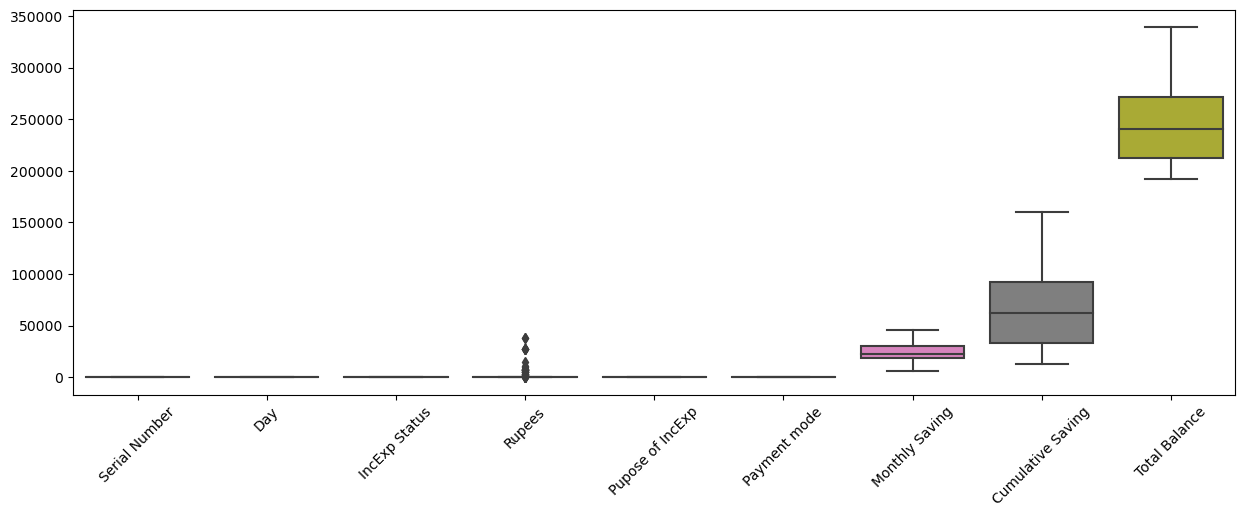

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 31-07-2023 to 04-02-2024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Day                269 non-null    int32  
 2   IncExp Status      269 non-null    int32  
 3   Rupees             269 non-null    float64
 4   Pupose of IncExp   269 non-null    int32  
 5   Payment mode       269 non-null    int32  
 6   Monthly Saving     269 non-null    float64
 7   Cumulative Saving  269 non-null    float64
 8   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 16.8+ KB


['Serial Number', 'Day', 'IncExp Status', 'Rupees', 'Pupose of IncExp', 'Payment mode', 'Monthly Saving', 'Cumulative Saving', 'Total Balance']


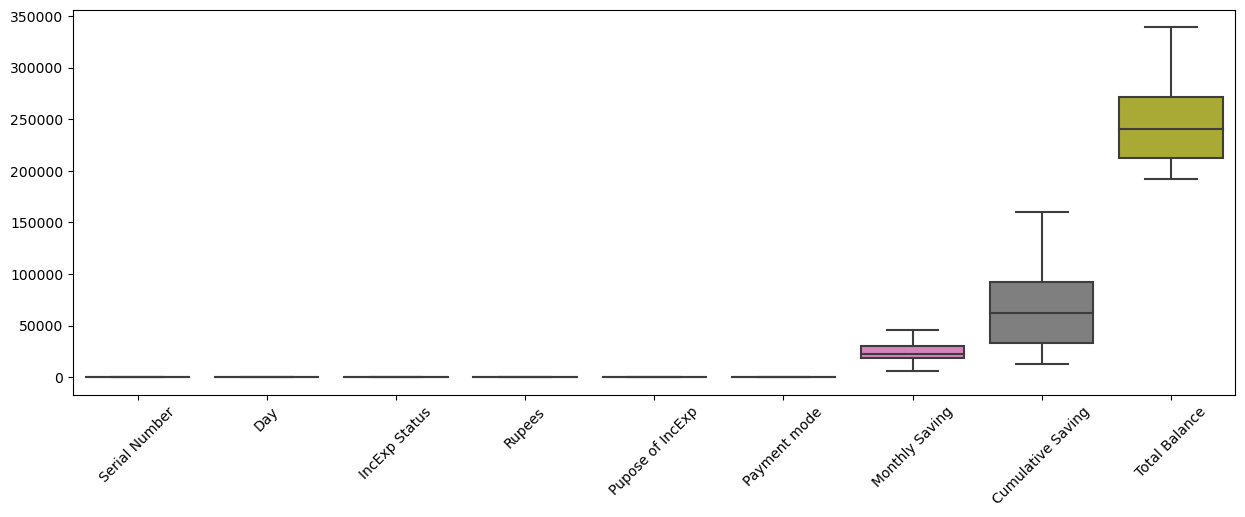

In [16]:
def outlier(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub
print(list(data.columns))
for i in list(data.columns):
    outlier(i)
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

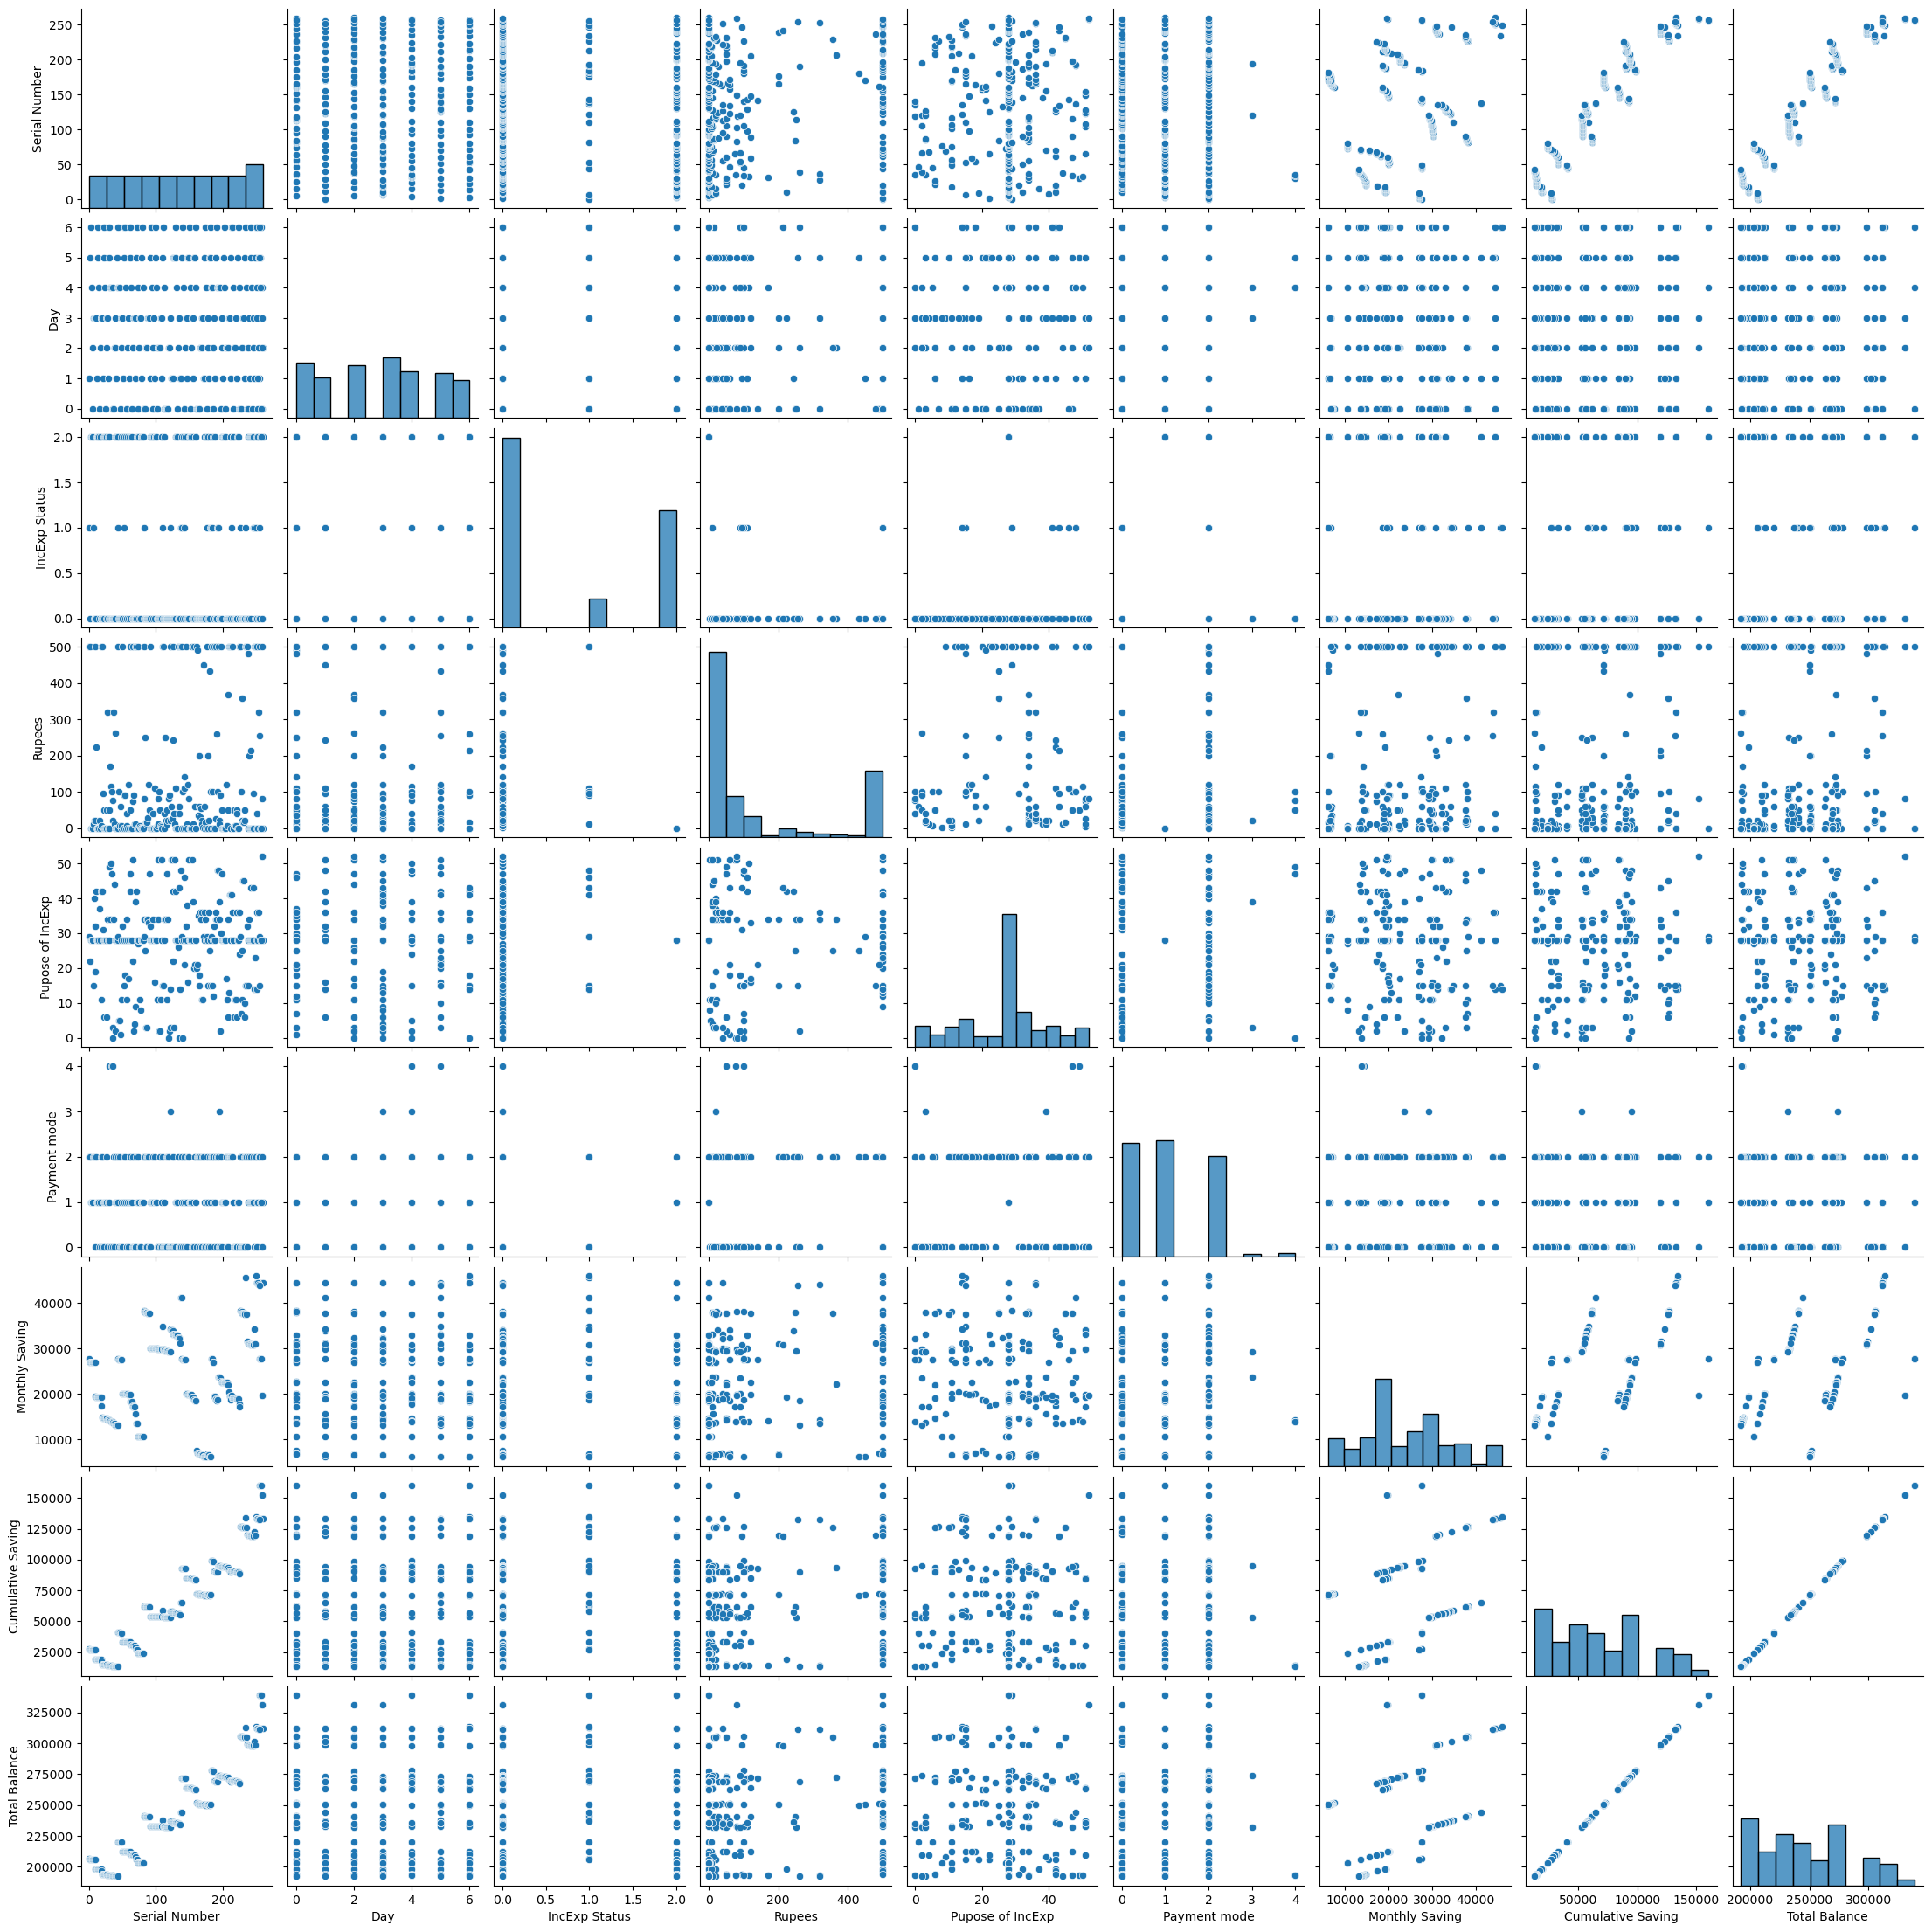

In [17]:
sns.pairplot(data)
plt.show()

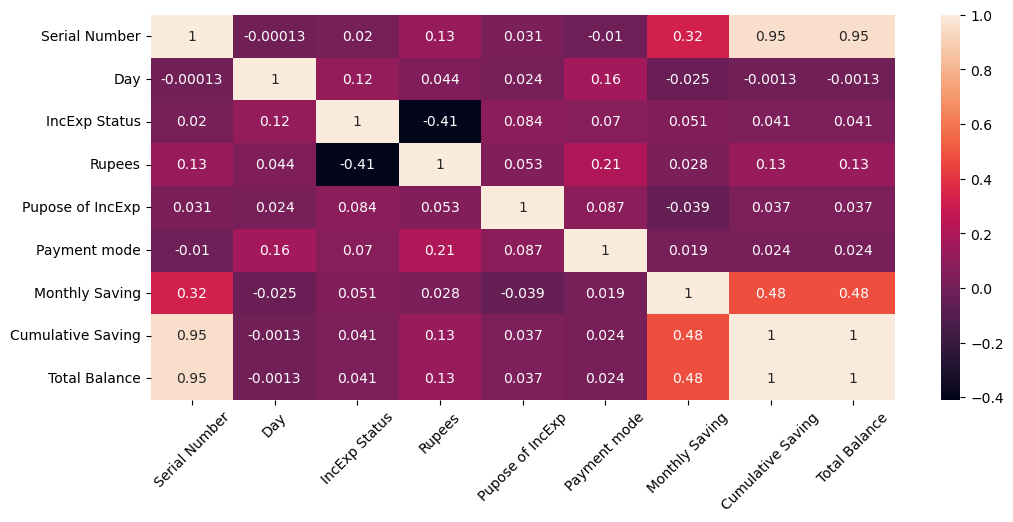

In [18]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[12,5])
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.show()

In [19]:
print(data.columns)
if "Date" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Date"])
if "Cumulative Saving" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Cumulative Saving"])
else:
    x=data.iloc[:,:-1]
    
y=data.iloc[:,-1]
data.reset_index(inplace=True)
data.head()

Index(['Serial Number', 'Day', 'IncExp Status', 'Rupees', 'Pupose of IncExp',
       'Payment mode', 'Monthly Saving', 'Cumulative Saving', 'Total Balance'],
      dtype='object')


,Date,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,31-07-2023,1,1.0,1,500.0,29.0,2,27700.0,27700.0,206620.21
1,01-08-2023,2,5.0,0,500.0,22.0,2,26979.1,26979.1,205899.31
2,02-08-2023,3,6.0,2,0.0,28.0,1,26979.1,26979.1,205899.31
3,03-08-2023,4,4.0,2,0.0,28.0,1,26979.1,26979.1,205899.31
4,04-08-2023,5,0.0,2,0.0,28.0,1,26979.1,26979.1,205899.31


In [20]:
len(x)

269

In [21]:
len(y)

269

In [22]:
len(data)

269

In [23]:
x

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving
Date,,,,,,,
31-07-2023,1,1.0,1,500.0,29.0,2,27700.0
01-08-2023,2,5.0,0,500.0,22.0,2,26979.1
02-08-2023,3,6.0,2,0.0,28.0,1,26979.1
03-08-2023,4,4.0,2,0.0,28.0,1,26979.1
04-08-2023,5,0.0,2,0.0,28.0,1,26979.1
...,...,...,...,...,...,...,...
31-01-2024,255,6.0,1,500.0,29.0,2,27700.0
01-02-2024,256,4.0,2,0.0,28.0,1,27700.0
02-02-2024,257,0.0,2,0.0,28.0,1,27700.0


In [24]:
y

Date
31-07-2023    206620.21
01-08-2023    205899.31
02-08-2023    205899.31
03-08-2023    205899.31
04-08-2023    205899.31
                ...    
31-01-2024    339000.58
01-02-2024    339000.58
02-02-2024    339000.58
03-02-2024    331000.58
04-02-2024    330920.58
Name: Total Balance, Length: 269, dtype: float64

# Model Building

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Linear Regression : LinearRegression()
Training score :  0.9351510061624085
Testing score :  0.9456106928287451
Mean absolute error :  6516.179935352404
Mean squared error :  79892458.45858155
Root mean squared error :  8938.2581333603
R2 score :  0.9456106928287451


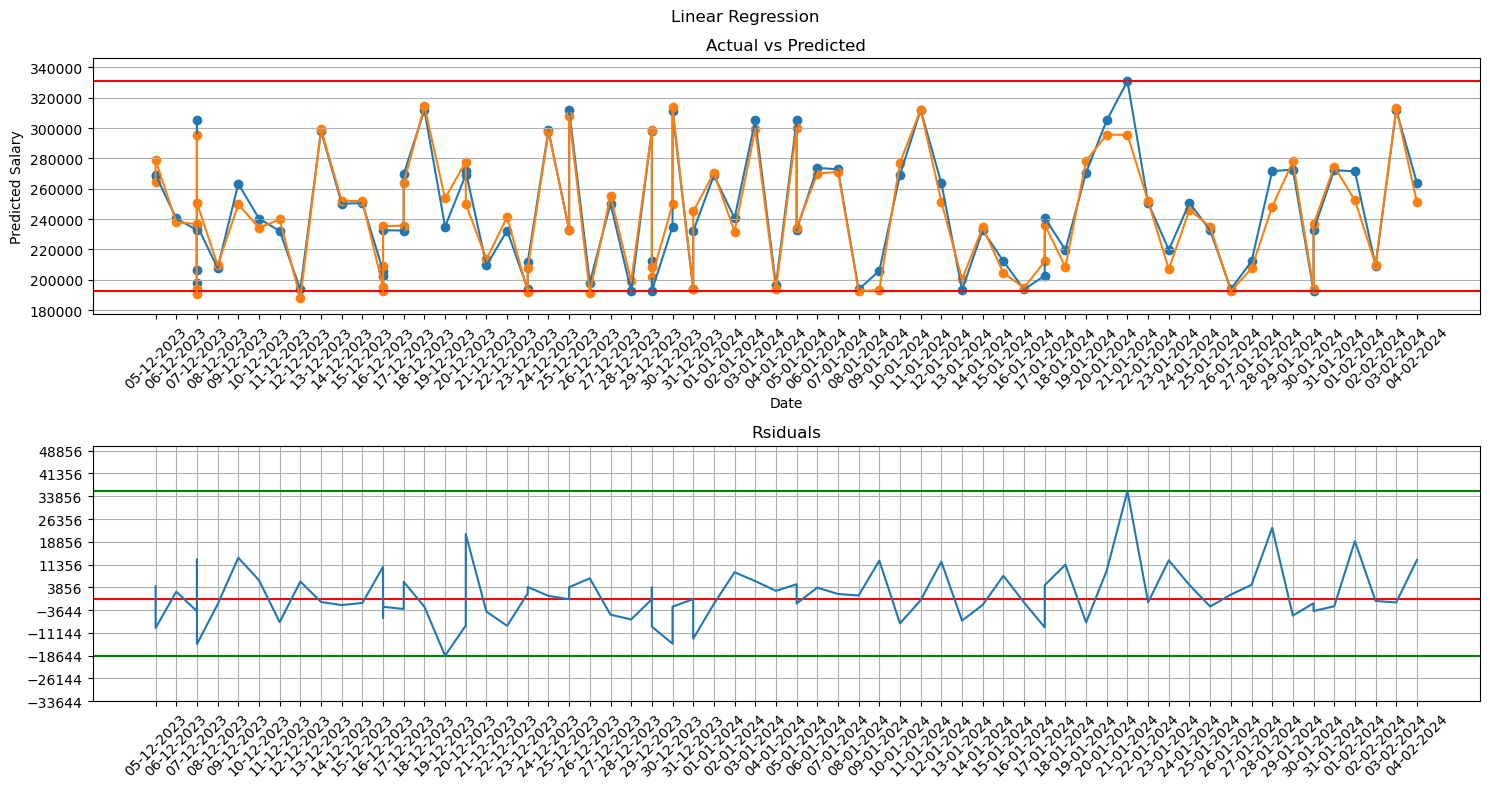

SVM Regression : SVR()
Training score :  -0.000811613896653185
Testing score :  -0.02919930826811923
Mean absolute error :  33427.23395412035
Mean squared error :  1511790961.4570012
Root mean squared error :  38881.75615191527
R2 score :  -0.02919930826811923


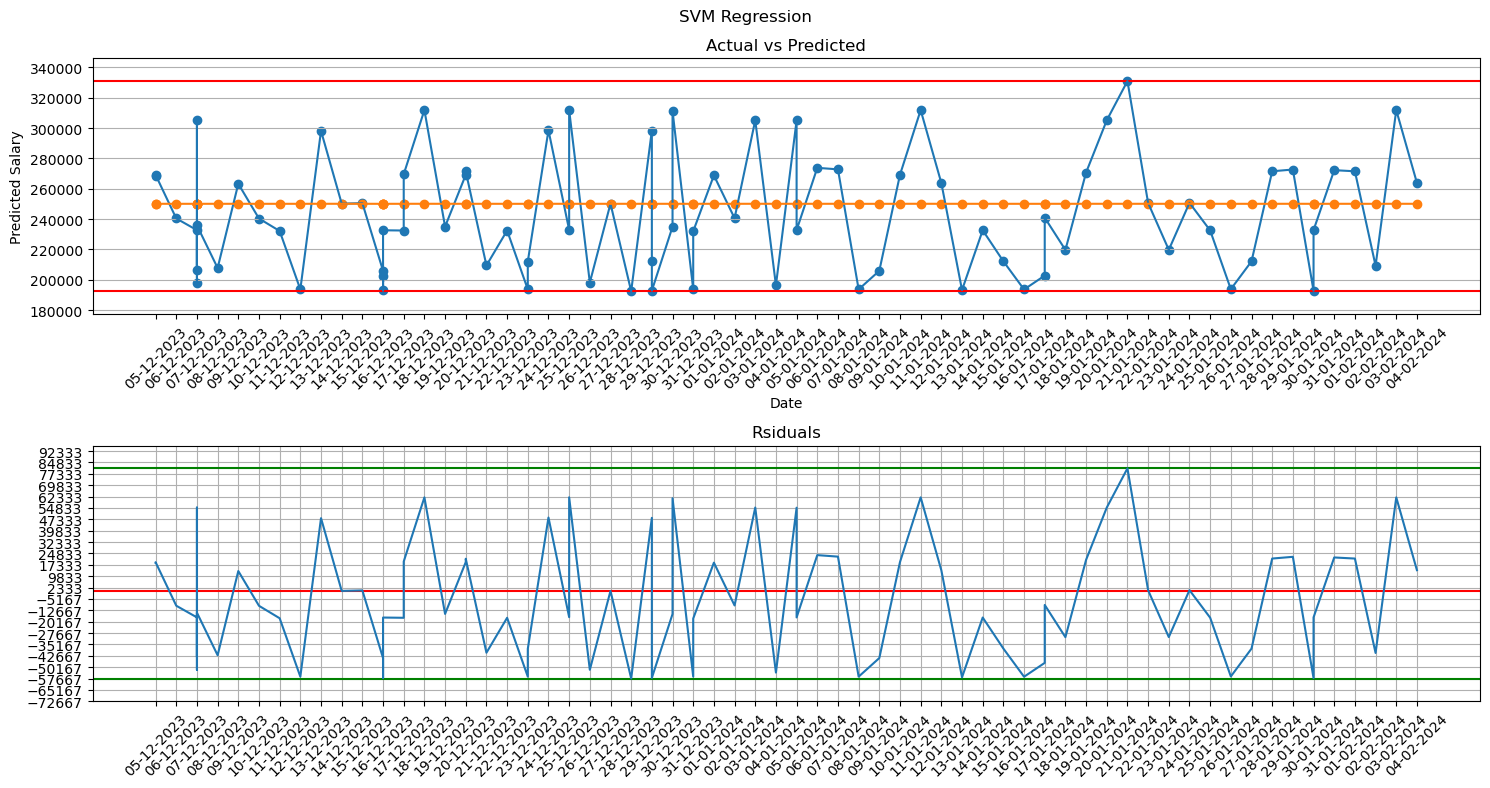

DecisionTree Regression : DecisionTreeRegressor()
Training score :  1.0
Testing score :  0.9983911868011206
Mean absolute error :  319.9822222222233
Mean squared error :  2363185.8603086416
Root mean squared error :  1537.265709078506
R2 score :  0.9983911868011206


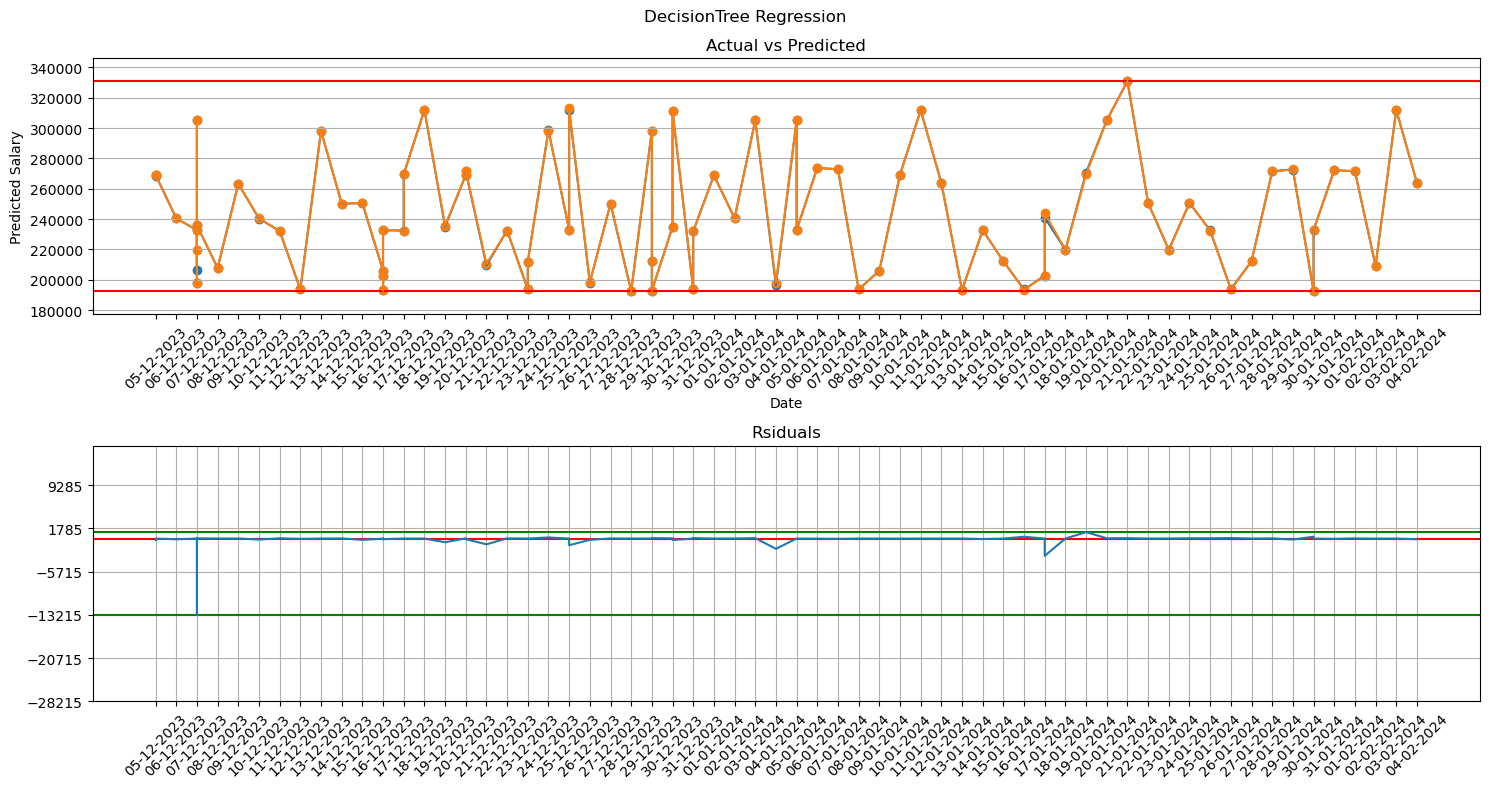

Randomforest Regression : RandomForestRegressor()
Training score :  0.9980160999445015
Testing score :  0.9974520283735506
Mean absolute error :  519.3292148147931
Mean squared error :  3742715.763574429
Root mean squared error :  1934.6099771205638
R2 score :  0.9974520283735506


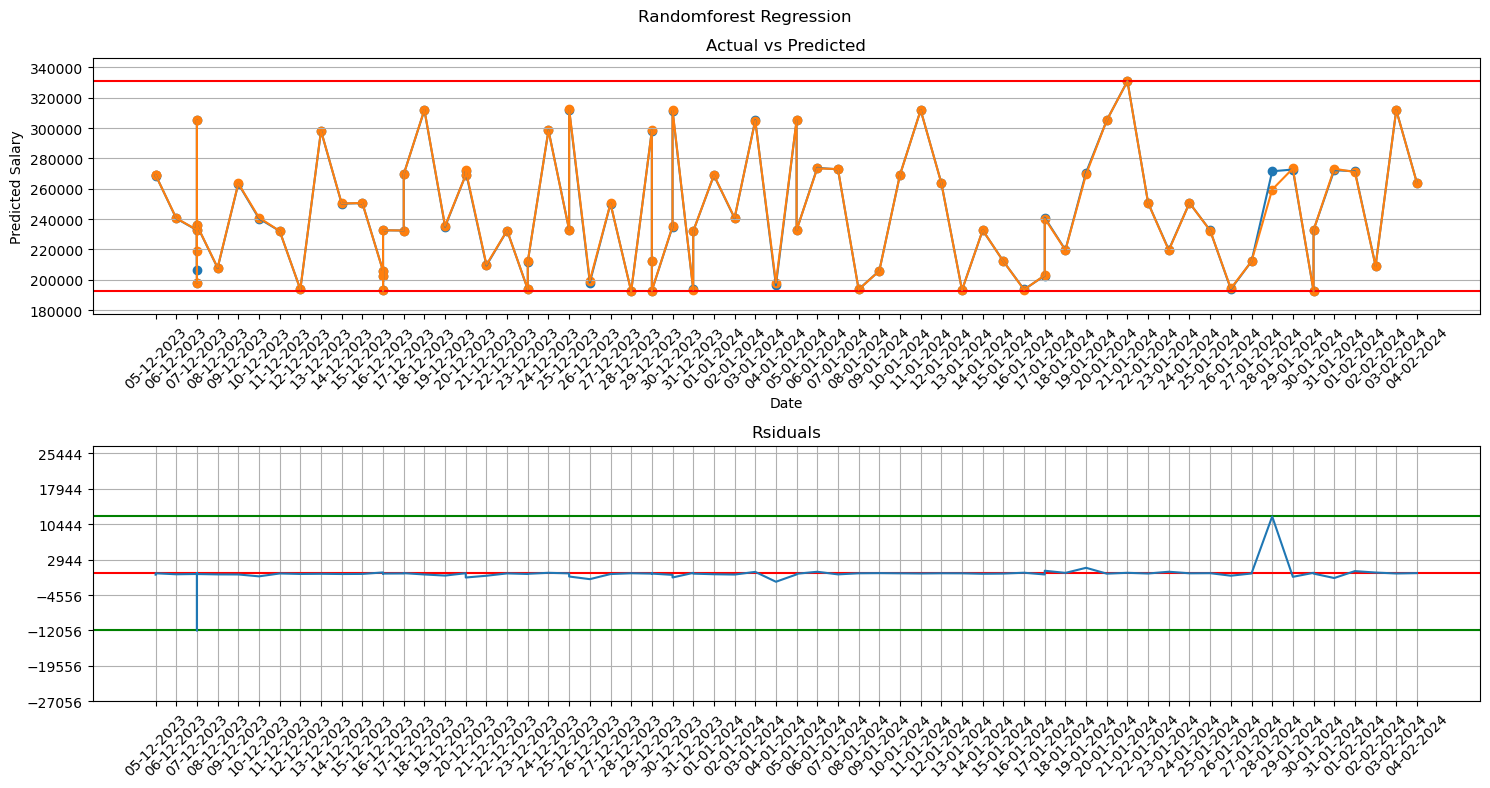

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,accuracy_score
import numpy as np
plot_step_size=15000
ytick_step_size=7500
c=str()
if "Date" in data.columns:
    c="Date"
else:
    c=data.columns[0]
if Reg_model_flag=="regression":    
    for regression_model_name,regression_model_reference in model_regression.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.xlabel(c)
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred)
        #plt.show()

        #plt.figure(figsize=[15,5])
        plt.subplot(2,1,2)
        plt.xticks(rotation=45)
        plt.axhline(max(y_test-y_pred),color="green")
        plt.axhline(0,color="red")
        plt.axhline(min(y_test-y_pred),color="green")
        plt.ylim(min(y_test-y_pred)-plot_step_size,max(y_test-y_pred)+plot_step_size)
        y_min, y_max = min(y_test-y_pred) - plot_step_size, max(y_test-y_pred) + plot_step_size
        plt.yticks(np.arange(y_min, y_max, ytick_step_size))  # Set stepping for y-axis
        plt.title(f"Rsiduals")
        plt.grid(axis='x')
        plt.grid(axis='y')        
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test-y_pred,'-')
        plt.tight_layout()
        plt.show() 
elif Reg_model_flag=="classification":
    # Inprogress
    for regression_model_name,regression_model_reference in model_Classify.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.xlabel("Dates")
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        #plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        sns.distplot(y_test,bins=20)
        sns.distplot(y_pred,bins=20)
        #sns.distplot(data[c],y_test)
        #sns.distplot(data[c],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.show()
else:
    pass
